#  Online Food Delivery Service

# 🍔 Online Food Delivery EDA

This notebook explores data from an online food delivery system, including customers, orders, restaurants, drivers, and reviews.

### Objectives:
- Understand customer behavior
- Analyze restaurant & cuisine trends
- Explore delivery performance
- Identify insights from reviews

## 📦 Setup & Data Loading

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [44]:


# Create connection
engine = create_engine(
    "mssql+pyodbc://@DESKTOP-JO9S3ED\\SQLEXPRESS/Online_Food_Delivery?driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes"
)


Customers= pd.read_sql_table("Customers", engine)
DeliveryAssignments = pd.read_sql_table("DeliveryAssignments", engine)
DeliveryDrivers= pd.read_sql_table("DeliveryDrivers", engine)
MenuItems= pd.read_sql_table("MenuItems", engine)
OrderDetails= pd.read_sql_table("OrderDetails", engine)
Orders= pd.read_sql_table("Orders", engine)
Restaurants= pd.read_sql_table("Restaurants", engine)
Reviews= pd.read_sql_table("Reviews", engine)


Customers.head()


,customer_id,first_name,last_name,gender,phone_number,email,address
0,1,Nathan,Vargas,Female,706-886-1206,brandon47@example.com,Unit 3133 Box 5173\nDPO AP 69115
1,2,Thomas,Flores,Female,3023674507,floresdavid@example.com,"796 Jason Flats\nPort Kenneth, IN 80525"
2,3,Tyrone,Yang,Female,+1-228-334-2103,michaelgonzalez@example.net,"86733 Robin Harbor Apt. 408\nWestport, WY 67696"
3,4,Jake,Ferguson,Male,5817100204,edward70@example.com,"261 Christopher Track\nLake Debraland, MS 22279"
4,5,Jeremiah,Williams,Male,001-383-800-8944x971,matthew23@example.com,"7469 Amy Island Suite 411\nCynthiaville, NV 68023"


## 📊 Univariate Analysis

In [4]:
cuisine_type=Restaurants['cuisine_type'].value_counts().reset_index()
cuisine_type

,cuisine_type,count
0,Pizza,13
1,Grill,9
2,Chinese,6
3,Seafood,6
4,Indian,6
5,Burger,5


In [5]:

fig=px.histogram(data_frame=cuisine_type,x='cuisine_type',y='count')
fig.update_layout(xaxis_title='Cuisine type',yaxis_title='', title='Cuisine Distribution')



In [6]:
orders=Orders['payment_method'].value_counts().reset_index()
px.pie(data_frame=orders,names='payment_method',values='count',title='Payment Methods Distribution')

In [7]:
rating=Reviews['rating'].value_counts().reset_index()

px.pie(data_frame=rating,names='rating',values='count',title='Resturant Rating Distribution')

In [8]:
customer=Customers['gender'].value_counts().reset_index()

px.pie(data_frame=customer,names='gender',values='count',title="Gender Distribution")

In [9]:
vehicle_type=DeliveryDrivers['vehicle_type'].value_counts().reset_index()
px.pie(data_frame=vehicle_type,names='vehicle_type',values='count',title="Vehicle Type")

In [10]:
order_status=Orders['order_status'].value_counts().reset_index()
px.pie(data_frame=order_status,names='order_status',values='count',title="Order_Status")

## 🔗 Bivariate Analysis


In [11]:
resturants_order=Orders.merge(right=Restaurants,how='left',on='restaurant_id')


In [12]:
most_Freq=resturants_order.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).reset_index()
most_Freq.columns=['Restaurant_Name','Orders_Count']


In [13]:

fig1=px.histogram(data_frame=most_Freq.head(10), x='Restaurant_Name', y='Orders_Count',title='Top 10 Restaurants by Number of Orders ')
fig1.update_layout(xaxis_title='Restaurant Name',yaxis_title='')



In [14]:
best_selling_cuisinetype=resturants_order.groupby('cuisine_type')['order_id'].count().sort_values(ascending=False).reset_index()
best_selling_cuisinetype.columns=['cuisine_type','orders_count']


In [15]:
fig1=px.histogram(data_frame=best_selling_cuisinetype, x='cuisine_type', y='orders_count',title='Numbers Of Orders by Cuisine Type ')
fig1.update_layout(xaxis_title='Cuisine Type',yaxis_title='')

Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

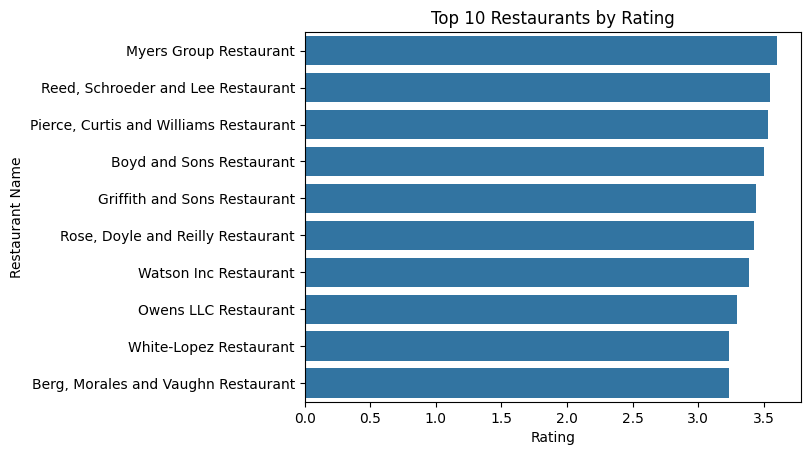

In [45]:
restaurants_review_merge=Restaurants.merge(right=Reviews,how='left',on='restaurant_id')
restaurants_review=restaurants_review_merge.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(data=restaurants_review,x='rating',y='restaurant_name')
plt.xlabel("Rating")
plt.ylabel("Restaurant Name")
plt.title("Top 10 Restaurants by Rating")

In [46]:
avg_rating = Reviews.groupby('restaurant_id')['rating'].mean().reset_index()
merged = Restaurants.merge(avg_rating, left_on='restaurant_id', right_on='restaurant_id')
px.box(merged, x='cuisine_type', y='rating')

In [19]:
restaurants_revenue_merge=Orders.merge(how='left',right=Restaurants,on='restaurant_id')
restaurants_revenue=restaurants_revenue_merge.groupby('restaurant_name')['total_price'].sum().sort_values(ascending=False).reset_index().head(10)
restaurants_revenue.columns=['restaurant_name','total_revenue']



In [20]:
px.bar(data_frame=restaurants_revenue,x='total_revenue',y='restaurant_name',title="Top 10 Restaurants by Revenue")

In [21]:
order_customer_merge=Orders.merge(how='left',right=Customers,on='customer_id')
order_customer=order_customer_merge.groupby('address')['order_id'].count().sort_values(ascending=False).reset_index().head(10)
order_customer.columns=['address','Orders Count']

In [22]:
px.bar(data_frame=order_customer,x='Orders Count',y='address',title="Top 10 Most Frequent Customer Addresses")

In [23]:
Orders['Day']=Orders['order_date'].dt.day_name()
orders_day=Orders.groupby('Day')['order_id'].count().sort_values(ascending=False).reset_index()
orders_day.columns=['Day','Orders Count']

In [24]:
px.bar(data_frame=orders_day,x='Day',y='Orders Count',title="Top Days by Orders Count")


In [25]:
DeliveryDrivers['fullname']=DeliveryDrivers['first_name']+' '+DeliveryDrivers['last_name']
DeliveryDrivers['fullname']
deliverydrivers_assignments_merged=DeliveryDrivers.merge(how='left',on='driver_id',right=DeliveryAssignments)


deliverydrivers_assignments=deliverydrivers_assignments_merged.groupby('fullname')['order_id'].count().sort_values(ascending=False).reset_index().head(10)
deliverydrivers_assignments.columns=['Full_Name','Orders_Count']


In [26]:
fig=px.bar(data_frame=deliverydrivers_assignments,y='Full_Name',x="Orders_Count",title="Top 10 Drivers by Orders Count")
fig.update_layout(
    xaxis_title="Number of Orders",
    yaxis_title="Driver Name"
)

In [43]:
dev=DeliveryAssignments.merge(DeliveryDrivers,how='left',on='driver_id') 
dev['delivery_time'] = (dev['delivered_time'] - dev['assigned_time']).dt.total_seconds() / 60
avg_delivery = dev.groupby('vehicle_type')['delivery_time'].mean().reset_index()
# Plot
fig = px.bar(avg_delivery, x='vehicle_type', y='delivery_time',
             title="Average Delivery Time by Vehicle Type",
             labels={'delivery_time':'Avg Delivery Time (minutes)', 'vehicle_type':'Vehicle Type'})
fig.show()

In [27]:
restaurant_by_cuisine=restaurants_review_merge.groupby('cuisine_type') ['rating'].mean().sort_values(ascending=False).reset_index()
restaurant_by_cuisine

,cuisine_type,rating
0,Indian,3.110429
1,Seafood,3.081761
2,Pizza,3.066667
3,Grill,3.061404
4,Chinese,2.972678
5,Burger,2.815789


In [28]:
fig=px.bar(data_frame=restaurant_by_cuisine,y='cuisine_type',x="rating",title="Avg Rating By Cuisine Type")
fig.update_layout(
    xaxis_title="Rating",
    yaxis_title="Cuisine Type"
)

## 🔀 Multivariate Analysis

In [29]:

avg_ratings = (
    restaurants_review_merge
    .groupby(['cuisine_type', 'restaurant_name'])['rating']
    .mean()
    .reset_index()
    .sort_values(['cuisine_type', 'rating'], ascending=False)
)

In [30]:
fig = px.bar(
    avg_ratings, 
    x="cuisine_type", 
    y="rating", 
    color="restaurant_name",   
    barmode="group",          
    title="Average Ratings by Cuisine Type and Restaurant"
)

fig.update_layout(
    xaxis_title="Cuisine Type",
    yaxis_title="Average Rating"
)

fig.show()

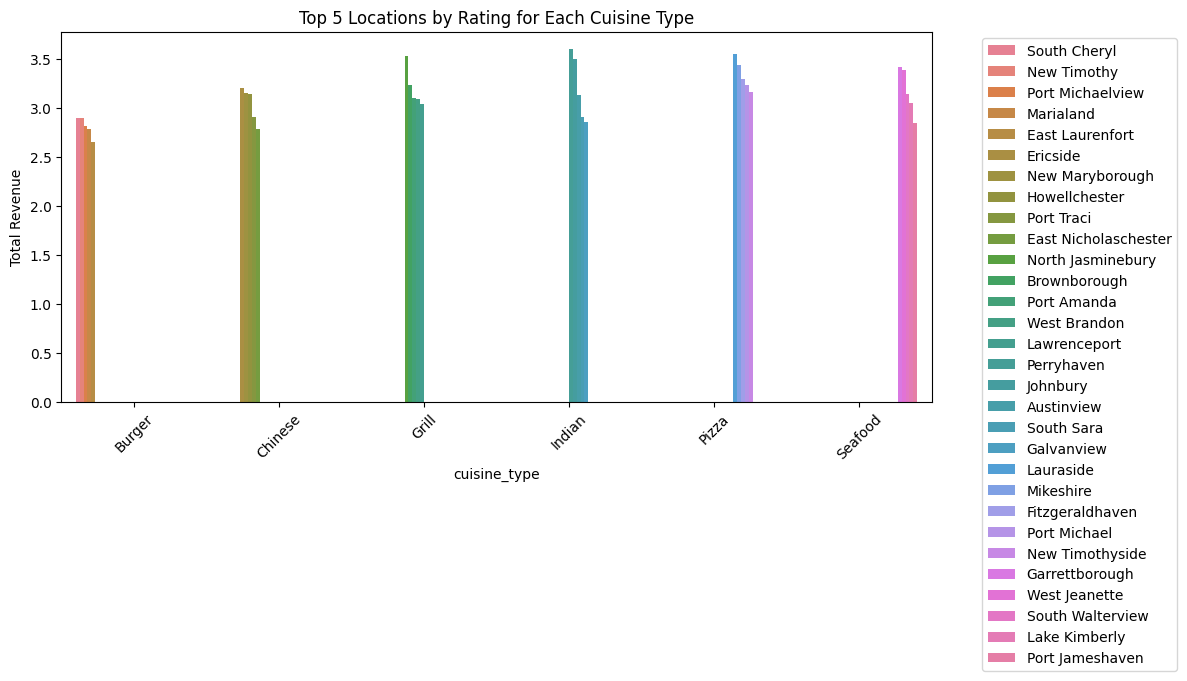

In [31]:

revenue_by_cuisine_location = (
    restaurants_review_merge
    .groupby(['cuisine_type', 'location'])['rating']
    .mean()
    .reset_index()
)

top_locations = (
    revenue_by_cuisine_location
    .sort_values(['cuisine_type', 'rating'], ascending=[True, False])
    .groupby('cuisine_type')
    .head(5)
)


plt.figure(figsize=(12,6))
sns.barplot(
    data=top_locations,
    x="cuisine_type", y="rating", hue="location"
)
plt.title("Top 5 Locations by Rating for Each Cuisine Type")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


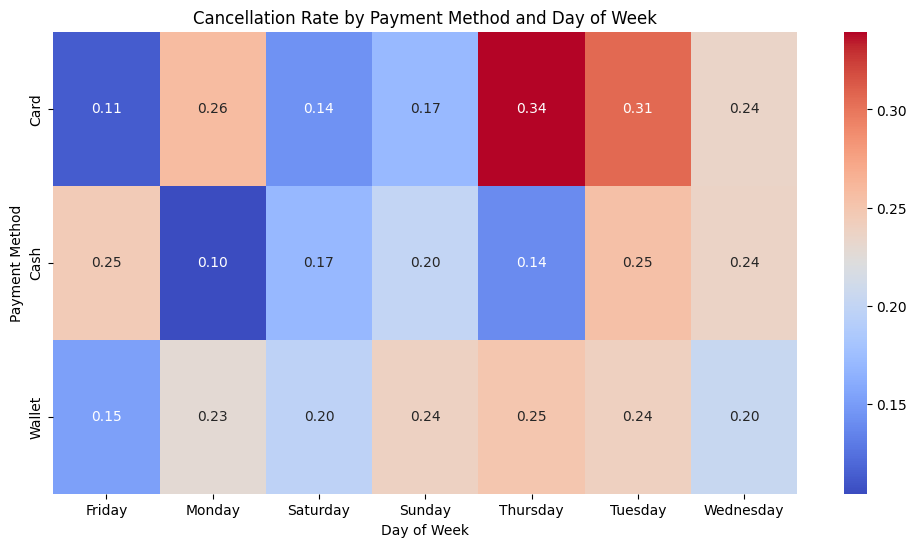

In [32]:

Orders["order_date"] = pd.to_datetime(Orders["order_date"])

cancel_rate = (
    Orders.groupby(["payment_method", "Day"])
    .agg(
        cancel_rate=("order_status", lambda x: (x == "Cancelled").mean()),
        n_orders=("order_id", "count")
    )
    .reset_index()
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    data=cancel_rate.pivot(index="payment_method", columns="Day", values="cancel_rate"),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Cancellation Rate by Payment Method and Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Payment Method")
plt.show()
